In [1]:
# Adding src module to path
import sys
import os
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
# general imports
from datetime import datetime
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import src.utils as utils
from src.ansatz import RBM


## Testing hidden node accuracy

Training several RBMs with increasing number of visible nodes. For each RBM we test how increasing the number of hidden nodes affects accuracy.

Total:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

func:'train' args:[(<src.ansatz.RBM object at 0x000002CB37E182E0>,), {'iter': 1000, 'lr': 0.01}] took: 0.7230 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB37E180D0>,), {'iter': 1000, 'lr': 0.01}] took: 0.7978 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB37E182E0>,), {'iter': 1000, 'lr': 0.01}] took: 0.8835 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB3563A850>,), {'iter': 1000, 'lr': 0.01}] took: 0.9459 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB37E180D0>,), {'iter': 1000, 'lr': 0.01}] took: 1.0278 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB37E18130>,), {'iter': 1000, 'lr': 0.01}] took: 1.0992 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB3561AD00>,), {'iter': 1000, 'lr': 0.01}] took: 1.1724 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB37E180D0>,), {'iter': 1000, 'lr': 0.01}] took: 1.2533 sec
func:'train' args:[(<src.ansatz.RBM object at 0x000002CB37E182E0>,), {'iter': 1000, 'lr'

<IPython.core.display.Javascript object>


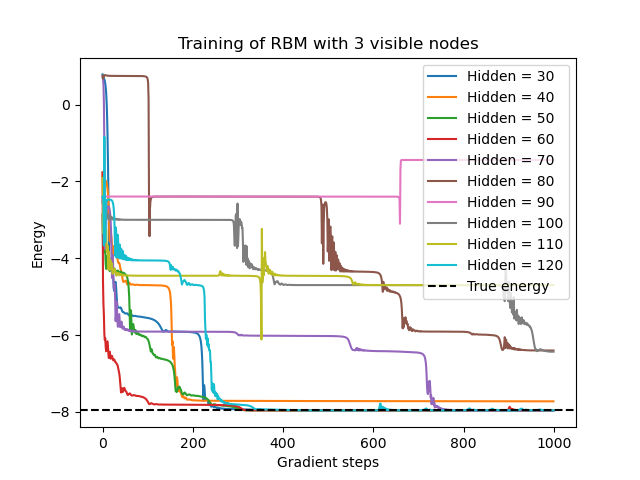

In [8]:

#Initializing starting values 
n_vis = 3
vis_inc = 0
total_vis = 1


n_hid_start = 30
n_hid = n_hid_start
hid_inc = 10
total_hid = 10

energy_list = []
n_hid_list =[]

seed = 42


username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d;%H%M'

path = f"{desktop_path}\\{datetime.now().strftime(date_format)}-RBMplots"
os.makedirs(path)

for i in tqdm(range(total_vis), position=0, desc=f"Total", leave=False, colour='green'):
    
    #Finding true ground state energy and displaying it
    np.random.seed(seed)
    
    hamiltonian = utils.random_hamiltonian(2**n_vis)
    eig,_ = np.linalg.eigh(hamiltonian)
    E_truth = np.min(eig)
    #print(f"Energy truth: {E_truth}")
    
    for j in tqdm(range(total_hid), position=1, desc=f"Training", leave=False, colour='red'):
        np.random.seed(seed)
        
        hamiltonian = utils.random_hamiltonian(2**n_vis)

        rbm = RBM(visible_size=n_vis, hidden_size=n_hid, hamiltonian=hamiltonian)
        energy_list.append(rbm.train(iter=1000, lr=0.01))
        n_hid_list.append(n_hid)
        n_hid += hid_inc
    
    # Print loop    
    labels = [f"Hidden = {i}" for i in n_hid_list]
    labels.append("True energy")
    
    # plt.ioff() # uncomment to stop plotting in notebook
    plt.figure(i)
    
    
    for energy in energy_list:
        plt.plot(energy)
        plt.xlabel('Gradient steps')
        plt.ylabel('Energy')

    plt.title(f"Training of RBM with {n_vis} visible nodes")
    plt.axhline(y=E_truth, color='k', linestyle='--')
    plt.legend(labels)

    # Save figure as pdf
    plt.savefig(f"{path}/{n_vis}nodes.pdf")
    
    n_vis += vis_inc
    n_hid = n_hid_start
    energy_list.clear()
    n_hid_list.clear()
    labels.clear()

